In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('data.csv')
len(df)

11914

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [18]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


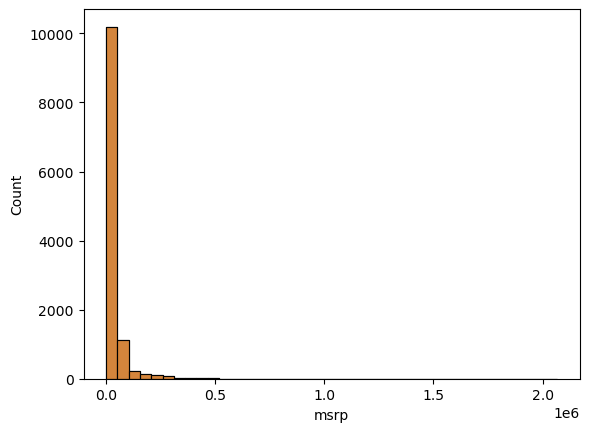

In [27]:
sns.histplot(data = df.msrp, bins=40)
plt.show()

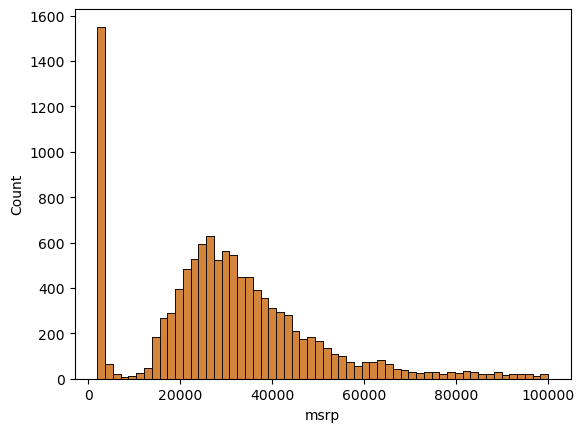

In [31]:
sns.histplot(df.msrp[df.msrp < 100000])
plt.show()

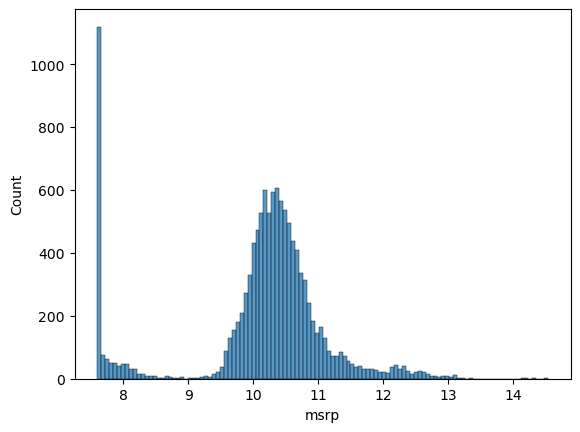

In [20]:
#логарифмируем данные
log_price = np.log1p(df.msrp)
sns.histplot(log_price)
plt.show()

In [8]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [22]:
#разделение данных на обучающую, проверочную и тестирующую выборки
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
np.random.seed(2) #нужно для восстановления исходного шаффла
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx] #создание перетасованного датафрейма
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [24]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [26]:
#удаление целевой переменной
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [28]:
def train_linear_regression(X, y):
    # добавление фиктивного столбца
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    # формула нормального уравнения
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [30]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
'popularity']
df_num = df_train[base]

In [32]:
df_num = df_num.fillna(0)

In [34]:
X_train = df_num.values
w_0, w = train_linear_regression(X_train, y_train)

In [36]:
y_pred = w_0 + X_train.dot(w)

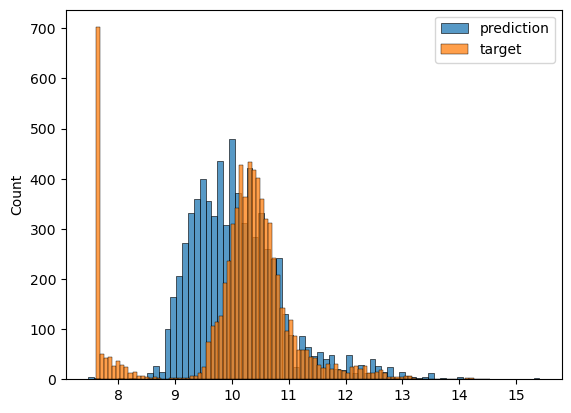

In [63]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()
plt.show()
#rmse 0.76

In [38]:
#feature-engineering
df_train['age'] = 2017 - df_train.year

In [40]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [42]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [44]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred)) #rmse better!

validation: 0.5172055461058335


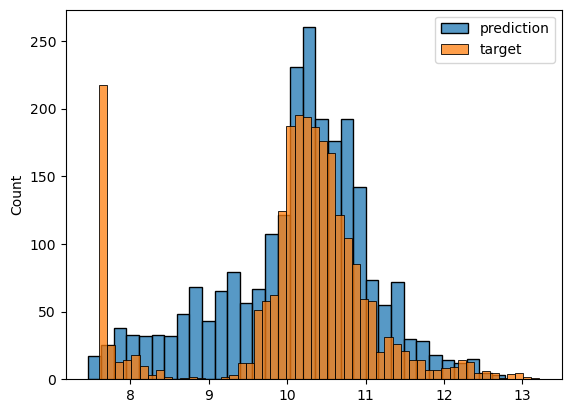

In [46]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()
plt.show()

In [50]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [52]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred)) #much better

validation: 0.5076038849557034


In [60]:
#regularization for prediction function
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [70]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f' % (r, w_0, w[13]))

    0, 10.68, -0.28
0.001, 10.68, -0.28
 0.01, 10.65, -0.28
  0.1, 10.42, -0.28
    1, 9.02, -0.28
   10, 6.89, -0.27


In [98]:
#let r  = 0.1
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5076120374936196


In [102]:
#check rmse on test data
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.5076038857689725
0.0001 0.5076039662855626
 0.001 0.5076046984349295
  0.01 0.5076120374936196
   0.1 0.507686873149346
     1 0.5084557973638316
     5 0.5118722208008771
    10 0.5172491335013901


In [104]:
#conducting that r = 0.1 is best convergence parametr
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.1)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.507686873149346
test: 0.5050905491018616


In [114]:
#model can be applied for generalization on data, error is 0.1%
#bringing ML model to life
ad = {
'city_mpg': 18,
'driven_wheels': 'all_wheel_drive',
'engine_cylinders': 6.0,
'engine_fuel_type': 'regular_unleaded',
'engine_hp': 268.0,
'highway_mpg': 25,
'make': 'toyota',
'market_category': 'crossover,performance',
'model': 'venza',
'number_of_doors': 4.0,
'popularity': 2000,
'transmission_type': 'automatic',
'vehicle_size': 'midsize',
'vehicle_style': 'wagon',
'year': 2015
}
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred) #exponenting value due to logarithming before
suggestion

array([32592.00078058])